In [26]:
# try everything here
import sys
import networkx as nx # type: ignore
import graphviz
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from dowhy import CausalModel

sys.path.append('../')
from src.data.make_dataset import load_data, merge_all_datasets

In [27]:
# Loading Data
data_dict = load_data()

olist_customers_df = data_dict['olist_customers_df']
olist_geolocation_df = data_dict['olist_geolocation_df']
olist_order_items_df = data_dict['olist_order_items_df']
olist_order_payments_df = data_dict['olist_order_payments_df']
olist_order_reviews_df = data_dict['olist_order_reviews_df']
olist_orders_df = data_dict['olist_orders_df']
olist_products_df = data_dict['olist_products_df']
olist_sellers_df = data_dict['olist_sellers_df']
product_category_name_translation_df = data_dict['product_category_name_translation_df']

olist_closed_deals_df = data_dict['olist_closed_deals_df']
olist_marketing_qualified_leads_df = data_dict['olist_marketing_qualified_leads_df']

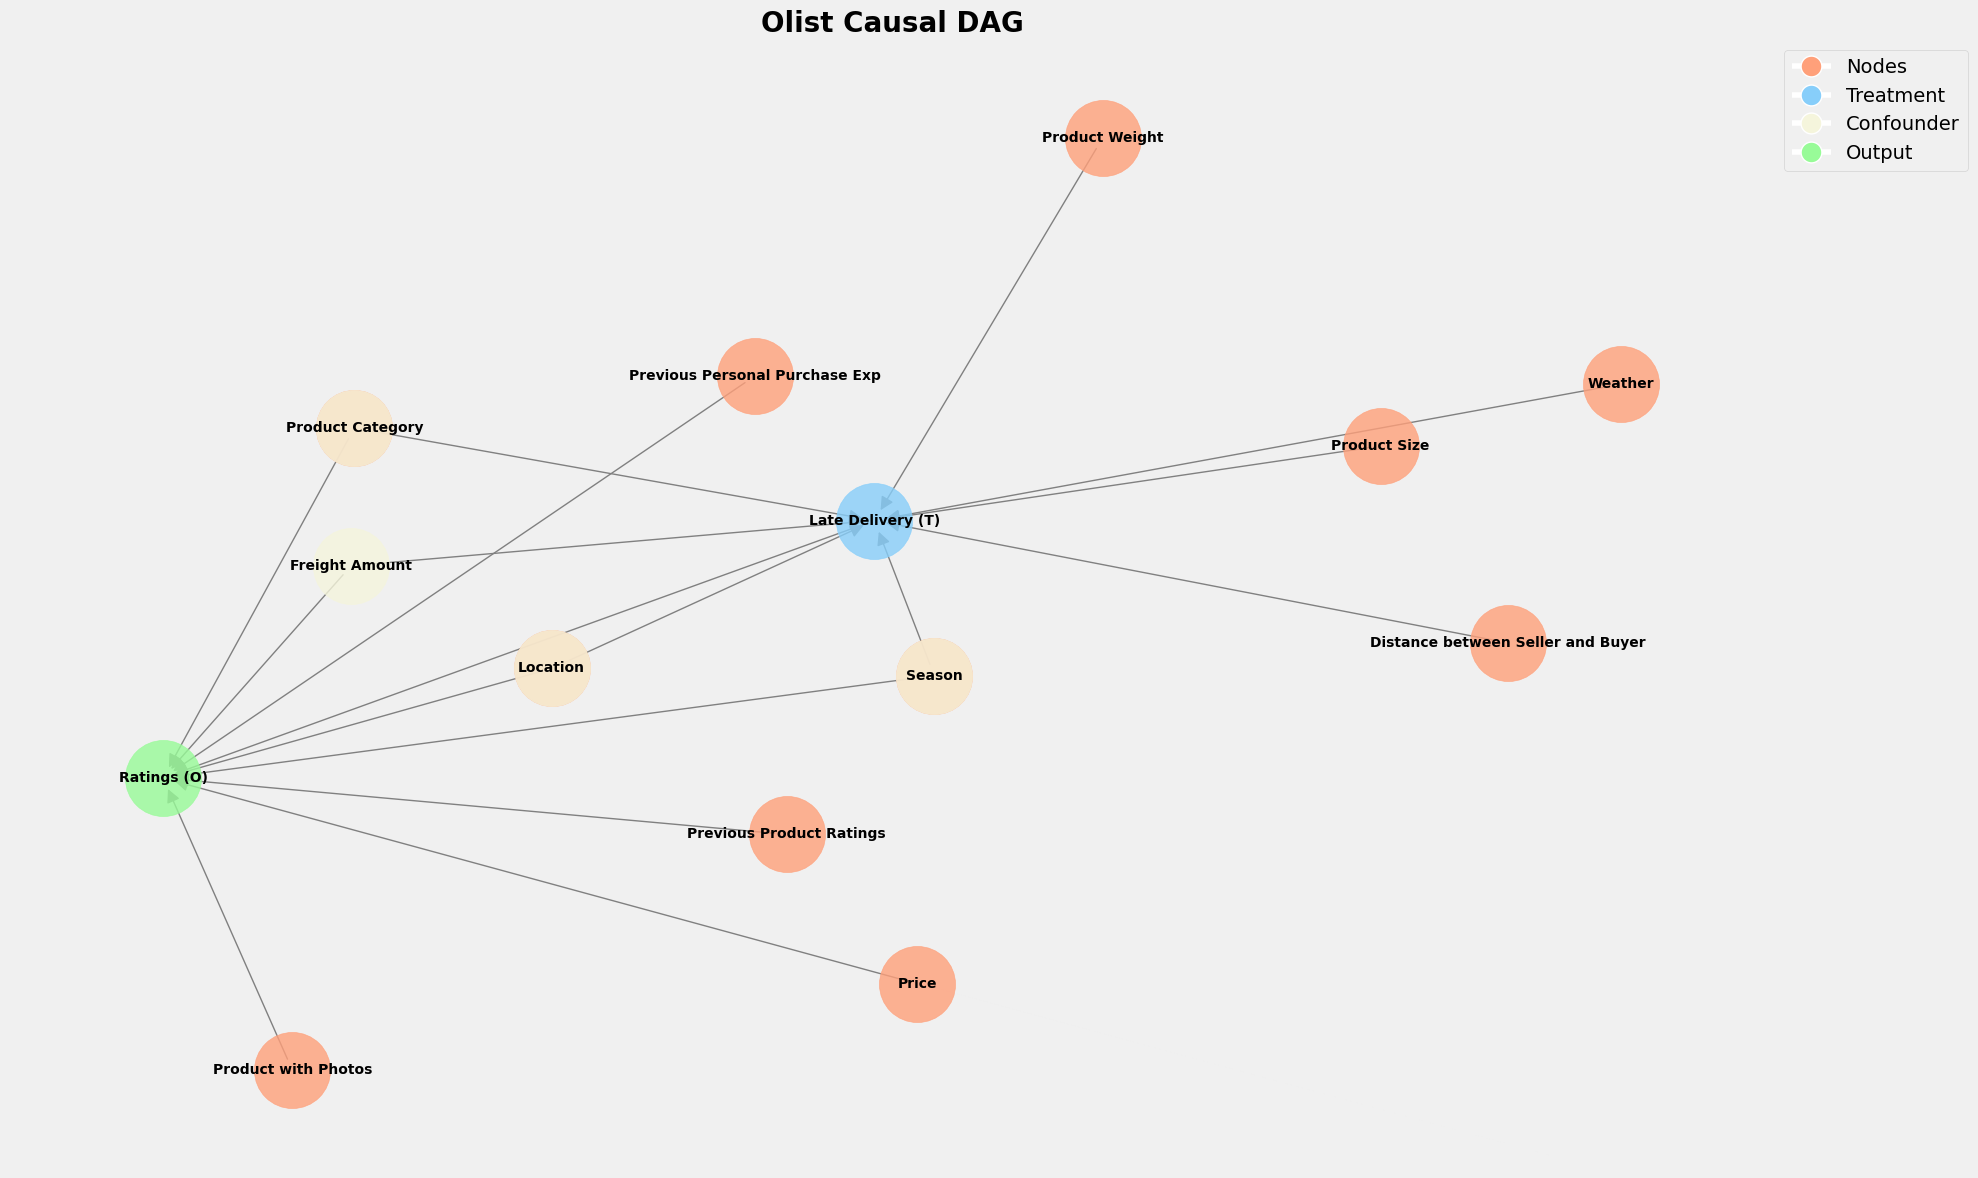

In [22]:
# Set the style
plt.style.use('fivethirtyeight')
sns.set_palette("pastel")

# Create a new directed graph
G = nx.DiGraph()

# Add nodes
nodes = [
    "Product Weight",
    "Weather",
    "Distance between Seller and Buyer",
    "Product Size",
    "Late Delivery (T)",
    "Previous Product Ratings",
    "Product with Photos",
    "Ratings (O)",
    "Price",
    "Previous Personal Purchase Exp",
    "Location",
    "Product Category",
    "Season",
    "Freight Amount"
]
G.add_nodes_from(nodes)

# Add edges (relationships)
edges = [
    ("Weather", "Late Delivery (T)"),
    ("Product Weight", "Late Delivery (T)"),
    ("Distance between Seller and Buyer", "Late Delivery (T)"),
    ("Product Size", "Late Delivery (T)"),
    ("Late Delivery (T)", "Ratings (O)"),
    ("Previous Product Ratings", "Ratings (O)"),
    ("Product with Photos", "Ratings (O)"),
    ("Price", "Ratings (O)"),
    ("Previous Personal Purchase Exp", "Ratings (O)"),
    ("Location", "Late Delivery (T)"),
    ("Location", "Ratings (O)"),
    ("Product Category", "Late Delivery (T)"),
    ("Product Category", "Ratings (O)"),
    ("Season", "Late Delivery (T)"),
    ("Season", "Ratings (O)"),
    ("Freight Amount", "Late Delivery (T)"),
    ("Freight Amount", "Ratings (O)")
]
G.add_edges_from(edges)

# Set up the plot
plt.figure(figsize=(20, 12))
pos = nx.spring_layout(G, k=0.5, iterations=50)

# Color mapping
color_map = {
    "nodes": "#FFA07A",     # Light Salmon
    "treatment": "#87CEFA",  # Light Sky Blue
    "confounder": "#F5F5DC",
    "output": "#98FB98"     # Pale Green
}

# Categorize nodes
node_categories = {
    "nodes": ["Product Weight", "Weather", "Distance between Seller and Buyer", "Product Size", "Previous Product Ratings", 
              "Product with Photos", "Price", "Previous Personal Purchase Exp", 
              "Location", "Product Category", "Season"],
    'confounder': ['Location', 'Product Category', 'Season', 'Freight Amount'],
    "treatment": ["Late Delivery (T)"],
    "output": ["Ratings (O)"]
}

# Draw nodes
for category, node_list in node_categories.items():
    nx.draw_networkx_nodes(G, pos, nodelist=node_list, node_color=color_map[category], 
                           node_size=3000, alpha=0.8)

# Draw edges
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True, arrowsize=20)

# Add labels
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

# Create a legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=cat.capitalize(),
                              markerfacecolor=color, markersize=15)
                   for cat, color in color_map.items()]
plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.title("Olist Causal DAG", fontsize=20, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()


In [28]:
df = merge_all_datasets(olist_customers_df, 
                       olist_geolocation_df,
                       olist_order_items_df,
                       olist_order_payments_df,
                       olist_order_reviews_df, 
                       olist_orders_df,
                       olist_products_df, 
                       olist_sellers_df
                       )

In [29]:
df

rainfall variable

In [13]:
rainfall_categories = {
    'North': {1: 'High', 2: 'High', 3: 'High', 4: 'Moderate', 5: 'Moderate', 6: 'Low', 7: 'Low', 8: 'Low', 9: 'Moderate', 10: 'Moderate', 11: 'High', 12: 'High'},
    'Northeast': {1: 'Low', 2: 'Moderate', 3: 'Moderate', 4: 'High', 5: 'High', 6: 'Moderate', 7: 'Low', 8: 'Low', 9: 'Low', 10: 'Moderate', 11: 'Moderate', 12: 'High'},
    'Central-West': {1: 'High', 2: 'High', 3: 'High', 4: 'Moderate', 5: 'Low', 6: 'Low', 7: 'Low', 8: 'Low', 9: 'Low', 10: 'Moderate', 11: 'High', 12: 'High'},
    'Southeast': {1: 'High', 2: 'High', 3: 'Moderate', 4: 'Moderate', 5: 'Low', 6: 'Low', 7: 'Low', 8: 'Low', 9: 'Moderate', 10: 'Moderate', 11: 'High', 12: 'High'},
    'South': {1: 'Moderate', 2: 'Moderate', 3: 'Moderate', 4: 'Moderate', 5: 'Moderate', 6: 'Low', 7: 'Low', 8: 'Low', 9: 'Moderate', 10: 'Moderate', 11: 'Moderate', 12: 'High'}
}

state_to_region = {
    'AC': 'North', 'AP': 'North', 'AM': 'North', 'PA': 'North', 'RO': 'North', 'RR': 'North', 'TO': 'North',
    'AL': 'Northeast', 'BA': 'Northeast', 'CE': 'Northeast', 'MA': 'Northeast', 'PB': 'Northeast', 'PE': 'Northeast', 'PI': 'Northeast', 'RN': 'Northeast', 'SE': 'Northeast',
    'GO': 'Central-West', 'MT': 'Central-West', 'MS': 'Central-West', 'DF': 'Central-West',
    'ES': 'Southeast', 'MG': 'Southeast', 'RJ': 'Southeast', 'SP': 'Southeast',
    'PR': 'South', 'RS': 'South', 'SC': 'South'
}

In [16]:
df['order_approved_at']

TypeError: 'NoneType' object is not subscriptable

In [15]:
# Convert 'order_approved_at' column to datetime if it's not already
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'])

# Extract the month from 'order_approved_at'
df['month'] = df['order_approved_at'].dt.month

# Map state to region
df['rainfall'] = df['customer_state'].map(state_to_region)       # --------------> or seller_state?

TypeError: 'NoneType' object is not subscriptable

weight variable

In [ ]:
df['Product_weight_kg'] = df['product_weight_g']/1000

distance variable

In [ ]:
# Define the Haversine function
def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the great-circle distance between two points
    on the Earth's surface given their latitude and longitude in decimal degrees.
    """
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    r = 6371  # Radius of Earth in kilometers
    distance = r * c

    return distance

# Example DataFrame
# df = pd.read_csv('path_to_your_data.csv')  # Replace with your actual data loading code

# Calculate distance for each row in the DataFrame
df['distance_km'] = df.apply(
    lambda row: haversine(
        row['geolocation_lat_x'], row['geolocation_lng_x'],
        row['geolocation_lat_y'], row['geolocation_lng_y']
    ),
    axis=1
)

product category variable

In [ ]:
df['Product_category'] = df['product_category_name']

size variable

In [ ]:
df['Product_size'] = df['product_length_cm'] * df['product_height_cm'] * df['product_width_cm']

### Previous rating

Rolling average of a customers previous rating (if they dont have previous orders it will be the same rating)

In [ ]:
df = df.sort_values(by=['customer_id', 'review_answer_timestamp'])

# Create a new column for the rolling mean excluding the last review
def rolling_mean_excluding_last(group):
    return group['review_score'].shift(1).rolling(window=len(group) - 1).mean()

df['customer_previous_score'] = df.groupby('customer_id').apply(rolling_mean_excluding_last).reset_index(drop=True)

# If the customer has no previous scores, just use the current score
df['customer_previous_score'] = df['customer_previous_score'].fillna(df['review_score'])

Rolling average of a sellers previous rating (if they dont have previous orders it will be the same rating)

In [ ]:
# Previous Personal Purchase Experience

# Sort the dataframe by customer and order purchase timestamp
df = df.sort_values(by=['seller_id', 'order_purchase_timestamp'])

# Define a function to compute the rolling mean of previous review scores for each customer
def rolling_mean_previous_customer(group):
    # Shift to exclude the current review and calculate rolling mean of all previous reviews
    return group['review_score'].shift(1).expanding().mean()

# Apply the function to each group of customers
df['seller_hist_rating'] = df.groupby('seller_id').apply(rolling_mean_previous_customer).reset_index(drop=True)

# Handle cases where there are no previous reviews (NaN values) by setting them to 0 or any default value
df['seller_hist_rating'] = df['seller_hist_rating'].fillna(0)

No_photos variable

In [ ]:
df['No_photos'] = df['product_photos_qty']

Price variable

In [ ]:
df['Product_price'] = df['price']

Delivery late variable

In [ ]:
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

df['late_delivery_in_days'] = (df['order_delivered_customer_date'] - df['order_estimated_delivery_date']).dt.days

df['is_delivery_late'] = np.where(df['late_delivery_in_days'] > 0, 1, 0)

Rating Variable

In [ ]:
df['Rating']= df['review_score']

Seasonality

In [ ]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['seasonality'] = df['order_purchase_timestamp'].dt.month

In [ ]:
df_final = df[['order_id', 'customer_id', 'order_status', 
            'order_item_id', 'product_id', 'seller_id','payment_value', 'review_id', 'review_score',
            'month', 'rainfall', 'Product_weight_kg', 'distance_km',
            'Product_category', 'Product_size', 'customer_previous_score', 'No_photos',
            'Product_price', 'seller_hist_rating', 'seasonality', 'is_delivery_late']]